#4.9.4 소프트맥스(다중 분류 로지스틱 회귀)

##M개의 입력을 받아 N개의 클래스로 분류하기
★★Keras 제공 원본 MNIST 손글씨 데이터셋을 사용하여 입력된 손글씨 숫자를 0부터 9까지 분류하기★★

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

##데이터 획득

In [ ]:
# MNIST 손글씨 숫자 데이터 입력
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 가로 28x 세로 28, 학습 데이터 6만장, 테스트 데이터 1만장.

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("train data (count, row, column) : " + str(X_train.shape) )
print("test data  (count, row, column) : " + str(X_test.shape) )

train data (count, row, column) : (60000, 28, 28)
test data  (count, row, column) : (10000, 28, 28)


In [ ]:
# 학습 데이터 중 첫 번째 데이터 출력
print("첫 번째 데이터 출력 레이블 = %d\n"%y_train[0])

for i in range(28):
    for j in range(28):
        print(str(X_train[0][i][j]).rjust(4),end='') # 픽셀값 찍기. .rjust(4) : 4칸 우측 정렬.
    print()

첫 번째 데이터 출력 레이블 = 5

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   


처음 6개 레이블 : 504192

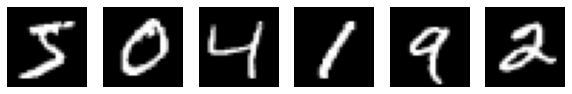

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#MNIST 숫자 데이터 그림 출력 (처음 6개만)
print("\n처음 6개 레이블 : ",end='')
plt.figure(figsize=(10,5)) # 전체 그림 크기
for i in range(6):
    arr = plt.subplot(1,6,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    plt.gray()  # 그림 흑백으로 출력
    arr.axis('off') # 즉 표시 안 함
    print(y_train[i],end='')

##데이터 정규화

In [ ]:
# 입력값(학습 데이터와 테스트 데이터의 값)들을 모두 0부터 1까지의 값이 되도록 변경
X_train = X_train.astype('float32') # float 형으로 형변환.
X_test = X_test.astype('float32')   # float 형으로 형변환
X_train /= 255 
X_test /= 255

# 정규화 확인 (첫 번째 학습 데이터)
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# 데이터 개수 출력
print("train target (count) : " + str(y_train.shape) )
print("test target  (count) : " + str(y_test.shape) )
# 첫 번째 데이터 숫자 확인
print("sample from train : " + str(y_train[0]) )
print("sample from test : " + str(y_test[0]) )

train target (count) : (60000,)
test target  (count) : (10000,)
sample from train : 5
sample from test : 7


##Softmax구조

Mounted at /content/drive


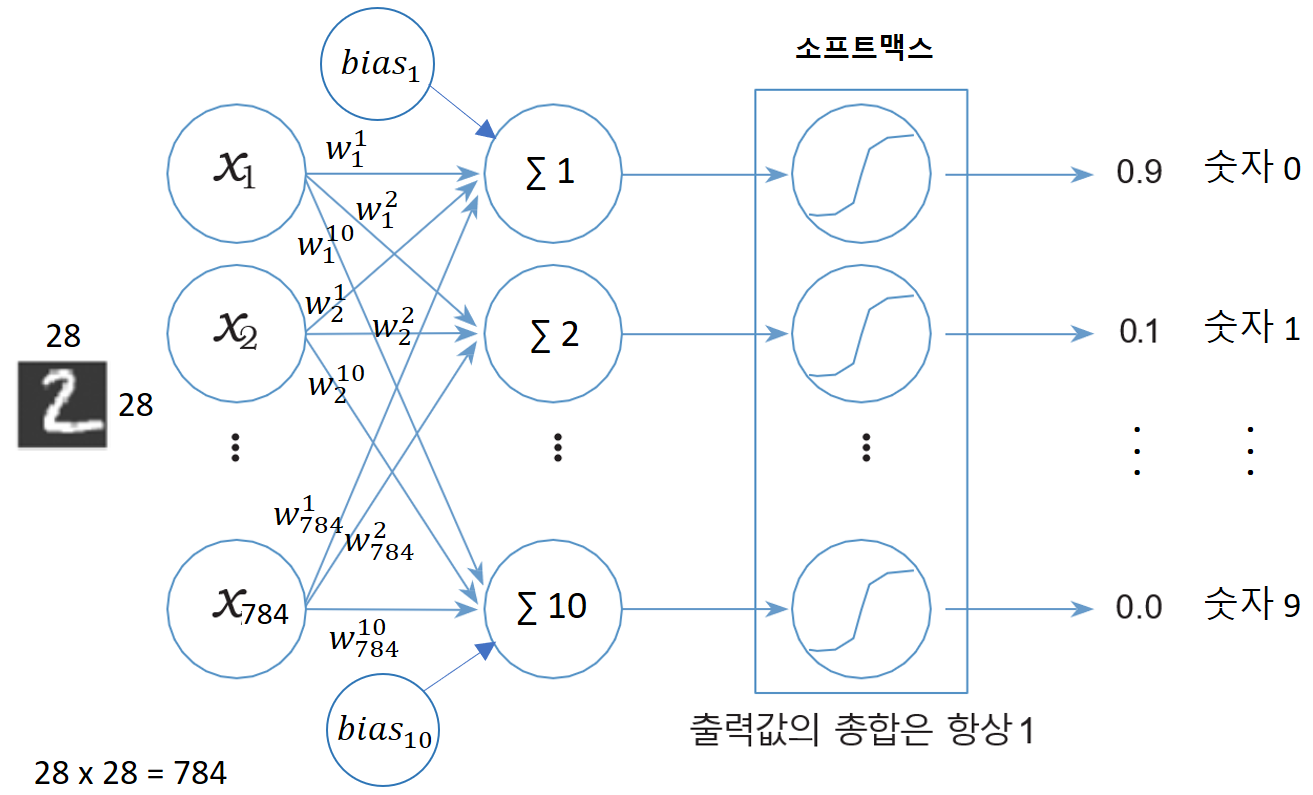

In [ ]:
# 이미지를 불러오기 위해 구글 드라이브 연동하기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 구글 드라이브의 로지스틱 회귀 모델 이미지 불러오기("내 드라이브" 폴더 => /content/drive/My Drive/)
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/png/4.9.4_Softmax.png", width=650, height=400)

In [ ]:
# 행열 구분(2차원,28x28) -> 1차원(784)으로 만들기
input_dim = 784 # 28*28  = 784
X_train = X_train.reshape(60000, input_dim) # (60000,28,28)를 (60000,784)로 변경
X_test = X_test.reshape(10000, input_dim)   # (10000,28,28)를 (10000,784)로 변경

In [ ]:
# 1차원 데이터 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train[0])   # 이걸로 확인하는게 확실. (28,28)이 (784)로 변경된 것 확인 가능.

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

##소프트맥스

In [ ]:
# 학습 시, y(레이블)와 cross entropy를 측정해야 하므로, y를 one hot encoding으로 변환.
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# one hot encoding 변환 확인
print("첫 번째 학습 데이터 (5) : ",y_train[0])
print("첫 번째 테스트 데이터 (7) : ",y_test[0])

첫 번째 학습 데이터 (5) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
첫 번째 테스트 데이터 (7) :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


##Keras의 Sequential()을 사용하여 소프트맥스 구현

In [ ]:
model = Sequential() 
# 입력(input_dim) 784개를 받아 출력(units)10개를 반환하는 선형회귀 레이어를 생성하고,
# 선형회귀의 출력 값을 softmax에 연결
model.add(Dense(input_dim=input_dim, units = 10, activation='softmax'))

# 크로스 엔트로피를 손실 함수로 설정해 경사하강법으로 학습 설정
# 여러 클래스 중 하나에 속해야 하는 분류 -> 범주형 크로스 엔트로피(categorical cross-entropy)
# 하나의 출력 유닛을 갖는 이진 분류 문제 -> 이진 크로스 엔트로피(binary cross-entropy) 
# sgd -> SGD(Stochastic Gradient Descent, 경사하강법) 사용
# metrics는 평가측정 방법. 소프트맥스는 accuracy(정확도)를 사용
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

##모델 학습

In [ ]:
myhistory = model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=1) # verbose=1 : 실행결과 보여주기
# 학습 데이터 = 60,000개, 배치 사이즈 = 2048. 60,000/2048 = 29.296875... 대략 30회(step, iteration) -> 1 epoch
# epoch이 100이므로 30 step을 100번 실행해야 함.

Epoch 1/100
30/30 [==============================] - 13s 10ms/step - loss: 2.3175 - accuracy: 0.0944
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 2.0302 - accuracy: 0.3577
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 1.8069 - accuracy: 0.5555
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 1.6248 - accuracy: 0.6540
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 1.4793 - accuracy: 0.7040
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 1.3613 - accuracy: 0.7304
Epoch 7/100
30/30 [==============================] - 0s 10ms/step - loss: 1.2632 - accuracy: 0.7522
Epoch 8/100
30/30 [==============================] - 0s 11ms/step - loss: 1.1860 - accuracy: 0.7683
Epoch 9/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1216 - accuracy: 0.7806
Epoch 10/100
30/30 [==============================] - 0s 10ms/step - loss: 1.0597 - accuracy: 0.7909

##학습 정확도 시각화

In [ ]:
# 구글코랩에서 matplotlib의 그림에 한글 사용하기 위해서는 본 셀과 바로 아래 셀을 모두 실행해야 함.

import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 상단 [런타임] > [런타임 다시 시작] 실행 후, [런타임]의 [모두 실행](Ctrl+F9)으로 
# 프로그램 전체 다시 실행해야 한글이 정상 표시됨. 그러므로
# 차후 한글 사용 프로그램의 경우 이 부분을 프로그램의 상단에 배치할 것.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling 

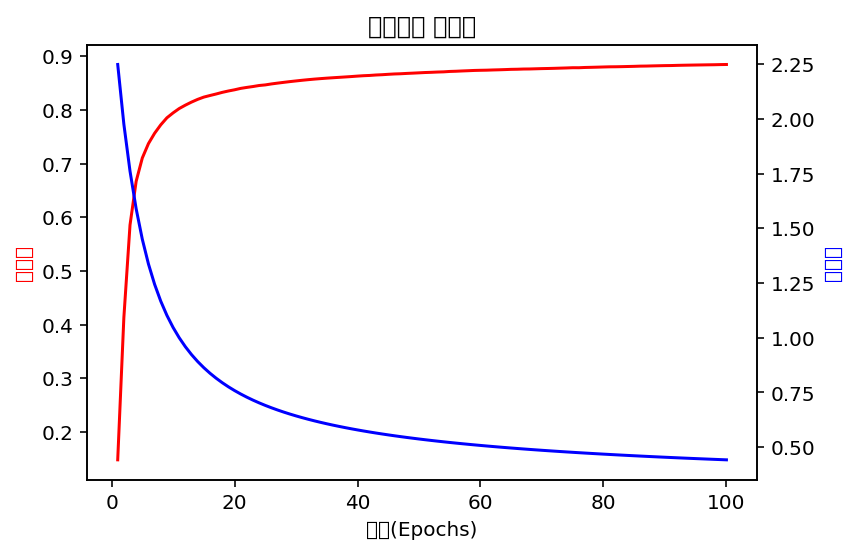

In [ ]:
# 화면에 그릴 데이터 설정
acc = myhistory.history['accuracy']
loss = myhistory.history['loss']
epochs = range(1, len(acc)+1)

# 이중 축 설정
fig, ax1 = plt.subplots()   
ax2 = ax1.twinx()

# 축 제목 설정
plt.title('정확도와 손실값')
ax1.set_xlabel('에폭(Epochs)')
ax1.set_ylabel('정확도', color='r')
ax2.set_ylabel('손실값', color='b')

# 데이터 그리기
ax1.plot(epochs, acc, color='r')
ax2.plot(epochs, loss, color='b')
plt.show()

##모델 테스트(테스트 데이터(10,000개)에 대해 예측 분류 실행)

In [ ]:
# evaluate는 테스트 데이터와 테스트 데이터의 출력 레이블(정답)을 넣어서 테스트 데이터에 대한 정확도를 계산
# (참고) predict는 테스트 데이터만 넣어서 출력 결과(예측 값)을 뽑아내는 명령임.
score = model.evaluate(X_test, y_test) 
print('테스트 정확도:', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8916
테스트 정확도: 0.8916000127792358


##모델 요약

In [ ]:
model.summary()
# dense_1 : 선형회귀 레이어. (None, 10)은 출력층의 노드가 10개라는 의미.
# dense_1의 Param 수가 7850인 것은 입력층 노드가 784개, 출력층 노드가 10개 이므로 784x10 = 7840개. 
#여기에 각 출력층에 연결되는 Bias가 10개이므로, 총 개수는 7840개 + 10개 = 7850개로 표시되고 있음.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 회귀계수(w)와 편향(bias)의 개수 출력
model.layers[0].weights
# (784, 10) : 784행 10열 -> weight 배열
# (10, ) -> bias 배열

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.05607424,  0.06566886,  0.06826479, ...,  0.01984628,
          0.07588004, -0.0523297 ],
        [-0.00621162,  0.05068066,  0.05273248, ...,  0.07676245,
         -0.04815902,  0.00422221],
        [ 0.08268998, -0.04069344,  0.0316784 , ..., -0.02787578,
         -0.07179862,  0.009283  ],
        ...,
        [-0.08366905, -0.04836139,  0.07358979, ..., -0.04505021,
         -0.04281331,  0.03043789],
        [ 0.03754956,  0.06750724, -0.00711118, ..., -0.01544109,
          0.02548035,  0.06674225],
        [ 0.04931868,  0.01696483, -0.06353373, ..., -0.08367281,
         -0.03757363,  0.0210795 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.08042447,  0.16215102, -0.03621641, -0.05885399,  0.06153388,
         0.16050388, -0.02310325,  0.11829192, -0.2662429 , -0.0376391 ],
       dtype=float32)>]